In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
cam = cv2.VideoCapture(0)
while True:
    ret, img = cam.read()
    img = cv2.flip(img,1)
    cv2.imshow("Webcam",img)
    if cv2.waitKey(1) == ord("q"):
        break
cam.release()
cv2.destroyAllWindows()

In [12]:
### Face Detection

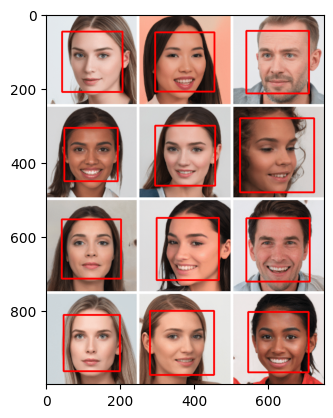

In [15]:
img = cv2.imread("face.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier("face.xml")
faces = face_cascade.detectMultiScale(img)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(img)
plt.show()

In [ ]:
### Eye Detection

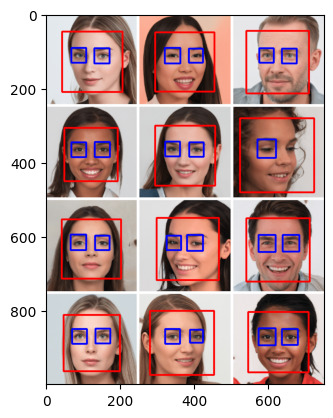

In [22]:
img = cv2.imread("face.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
face_cascade = cv2.CascadeClassifier("face.xml")
eye_cascade = cv2.CascadeClassifier("eye.xml")
faces = face_cascade.detectMultiScale(img)
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    face = img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(face,1.22)
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)
plt.imshow(img)
plt.show()

In [25]:
cam = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier("face.xml")
eye_cascade = cv2.CascadeClassifier("eye.xml")
while True:
    ret, img = cam.read()
    img = cv2.flip(img,1)
    faces = face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
        face = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(face,1.22)
        for ex,ey,ew,eh in eyes:
            cv2.rectangle(face,(ex,ey),(ex+ew,ey+eh),(0,0,255),3)
    cv2.imshow("Webcam",img)
    if cv2.waitKey(1) == ord("q"):
        break
cam.release()
cv2.destroyAllWindows()

In [26]:
### Replace the background

In [28]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation

In [34]:
cam = cv2.VideoCapture(0)
segment = SelfiSegmentation()
while True:
    ret, img = cam.read()
    img = cv2.flip(img,1)
    new_img = segment.removeBG(img,(110,80,10),cutThreshold=0.5)
    cv2.imshow("Webcam",img)
    cv2.imshow("New Image",new_img)
    if cv2.waitKey(1) == ord("q"):
        break
cam.release()
cv2.destroyAllWindows()

In [38]:
cam = cv2.VideoCapture(0)
segment = SelfiSegmentation()
back_img = cv2.imread("back.jpg")
back_img = cv2.resize(back_img,(640,480))
while True:
    ret, img = cam.read()
    img = cv2.resize(img,(640,480))
    img = cv2.flip(img,1)
    new_img = segment.removeBG(img,back_img,cutThreshold=0.5)
    cv2.imshow("Webcam",img)
    cv2.imshow("New Image",new_img)
    if cv2.waitKey(1) == ord("q"):
        break
cam.release()
cv2.destroyAllWindows()